In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from datetime import datetime

from pycaret.regression import *

pd.set_option("display.max_columns", 40)
pd.set_option("display.max_rows", 40)

In [2]:
DATA_DIR = Path("data")

FILE_2023 = DATA_DIR / "halfmarathon_wroclaw_2023__final.csv"
FILE_2024 = DATA_DIR / "halfmarathon_wroclaw_2024__final.csv"

In [3]:
df_2023 = pd.read_csv(FILE_2023, sep=';')
df_2024 = pd.read_csv(FILE_2024, sep=';')

print(df_2023.shape, df_2024.shape)

(8950, 27) (13007, 27)


In [4]:
display(df_2023.head())
display(df_2024.head())

print(df_2023.columns)
print(df_2024.columns)

,Miejsce,Numer startowy,Imię,Nazwisko,Miasto,Kraj,Drużyna,Płeć,Płeć Miejsce,Kategoria wiekowa,Kategoria wiekowa Miejsce,Rocznik,5 km Czas,5 km Miejsce Open,5 km Tempo,10 km Czas,10 km Miejsce Open,10 km Tempo,15 km Czas,15 km Miejsce Open,15 km Tempo,20 km Czas,20 km Miejsce Open,20 km Tempo,Tempo Stabilność,Czas,Tempo
0,1.0,1787,TOMASZ,GRYCKO,NaN,POL,UKS BLIZA WŁADYSŁAWOWO,M,1.0,M30,1.0,1992.0,00:14:37,1.0,2.923333,00:29:15,1.0,2.926667,00:44:47,1.0,3.106667,01:01:43,1.0,3.386667,0.031400,01:04:59,3.080509
1,2.0,3,ARKADIUSZ,GARDZIELEWSKI,WROCŁAW,POL,ARKADIUSZGARDZIELEWSKI.PL,M,2.0,M30,2.0,1986.0,00:14:48,2.0,2.960000,00:29:43,2.0,2.983333,00:45:26,2.0,3.143333,01:03:08,2.0,3.540000,0.038000,01:06:23,3.146875
2,3.0,3832,KRZYSZTOF,HADAS,POZNAŃ,POL,NaN,M,3.0,M20,1.0,1996.0,00:15:46,4.0,3.153333,00:31:23,3.0,3.123333,00:47:34,3.0,3.236667,01:05:09,3.0,3.516667,0.024067,01:08:24,3.242475
3,4.0,416,DAMIAN,DYDUCH,KĘPNO,POL,AZS POLITECHNIKA OPOLSKA,M,4.0,M30,3.0,1988.0,00:16:11,6.0,3.236667,00:32:10,5.0,3.196667,00:48:49,5.0,3.330000,01:06:54,4.0,3.616667,0.025467,01:10:16,3.330963
4,5.0,8476,KAMIL,MAŃKOWSKI,MIRKÓW,POL,PARKRUN WROCŁAW,M,5.0,M20,2.0,1995.0,00:16:12,7.0,3.240000,00:32:35,7.0,3.276667,00:49:31,7.0,3.386667,01:07:27,5.0,3.586667,0.023000,01:10:27,3.339654


,Miejsce,Numer startowy,Imię,Nazwisko,Miasto,Kraj,Drużyna,Płeć,Płeć Miejsce,Kategoria wiekowa,Kategoria wiekowa Miejsce,Rocznik,5 km Czas,5 km Miejsce Open,5 km Tempo,10 km Czas,10 km Miejsce Open,10 km Tempo,15 km Czas,15 km Miejsce Open,15 km Tempo,20 km Czas,20 km Miejsce Open,20 km Tempo,Tempo Stabilność,Czas,Tempo
0,1.0,596,NIKODEM,DWORCZAK,KOŚCIAN,POL,NaN,M,1.0,M20,1.0,1998.0,00:15:06,3.0,3.020000,00:29:42,3.0,2.920000,00:45:07,2.0,3.083333,01:00:33,1.0,3.086667,0.007267,01:04:03,3.036265
1,2.0,616,MATEUSZ,KACZOR,RADOM,POL,RLTL OPTIMA RADOM,M,2.0,M20,2.0,1997.0,00:15:06,4.0,3.020000,00:29:42,1.0,2.920000,00:45:07,3.0,3.083333,01:00:38,2.0,3.103333,0.008267,01:04:24,3.052856
2,3.0,154,PATRYK,KOZŁOWSKI,RADOM,POL,RLTL-ZTE-RADOM,M,3.0,M20,3.0,1998.0,00:15:06,2.0,3.020000,00:29:42,2.0,2.920000,00:45:07,1.0,3.083333,01:00:59,3.0,3.173333,0.012467,01:04:40,3.065497
3,4.0,591,DARIUSZ,BORATYŃSKI,WROCŁAW,POL,WOSIEK TEAM AZS AWF WROCŁAW,M,4.0,M20,4.0,1997.0,00:15:47,7.0,3.156667,00:31:20,5.0,3.110000,00:47:48,4.0,3.293333,01:05:40,4.0,3.573333,0.028667,01:09:44,3.305681
4,5.0,521,SZYMON,DOROŻYŃSKI,LUBON,POL,SZYMI TEAM AZS POLITECHNIKA OPOLSKA,M,5.0,M30,1.0,1992.0,00:15:07,5.0,3.023333,00:30:53,4.0,3.153333,00:48:09,5.0,3.453333,01:06:05,5.0,3.586667,0.039800,01:10:05,3.322272


Index(['Miejsce', 'Numer startowy', 'Imię', 'Nazwisko', 'Miasto', 'Kraj',
       'Drużyna', 'Płeć', 'Płeć Miejsce', 'Kategoria wiekowa',
       'Kategoria wiekowa Miejsce', 'Rocznik', '5 km Czas',
       '5 km Miejsce Open', '5 km Tempo', '10 km Czas', '10 km Miejsce Open',
       '10 km Tempo', '15 km Czas', '15 km Miejsce Open', '15 km Tempo',
       '20 km Czas', '20 km Miejsce Open', '20 km Tempo', 'Tempo Stabilność',
       'Czas', 'Tempo'],
      dtype='object')
Index(['Miejsce', 'Numer startowy', 'Imię', 'Nazwisko', 'Miasto', 'Kraj',
       'Drużyna', 'Płeć', 'Płeć Miejsce', 'Kategoria wiekowa',
       'Kategoria wiekowa Miejsce', 'Rocznik', '5 km Czas',
       '5 km Miejsce Open', '5 km Tempo', '10 km Czas', '10 km Miejsce Open',
       '10 km Tempo', '15 km Czas', '15 km Miejsce Open', '15 km Tempo',
       '20 km Czas', '20 km Miejsce Open', '20 km Tempo', 'Tempo Stabilność',
       'Czas', 'Tempo'],
      dtype='object')


In [5]:
assert list(df_2023.columns) == list(df_2024.columns)

In [6]:
df_2023["Rok"] = 2023
df_2024["Rok"] = 2024

In [7]:
df = pd.concat([df_2023, df_2024], ignore_index=True)
print(df.shape)

(21957, 28)


In [8]:
def time_to_seconds(t):
    if pd.isna(t):
        return np.nan
    if isinstance(t, (int, float)):
        return t
    parts = str(t).split(":")
    try:
        if len(parts) == 3:
            h, m, s = parts
            return int(h) * 3600 + int(m) * 60 + int(s)
        elif len(parts) == 2:
            m, s = parts
            return int(m) * 60 + int(s)
    except:
        return np.nan

df["Czas_sek"] = df["Czas"].apply(time_to_seconds)

In [9]:
display(df.head())

,Miejsce,Numer startowy,Imię,Nazwisko,Miasto,Kraj,Drużyna,Płeć,Płeć Miejsce,Kategoria wiekowa,Kategoria wiekowa Miejsce,Rocznik,5 km Czas,5 km Miejsce Open,5 km Tempo,10 km Czas,10 km Miejsce Open,10 km Tempo,15 km Czas,15 km Miejsce Open,15 km Tempo,20 km Czas,20 km Miejsce Open,20 km Tempo,Tempo Stabilność,Czas,Tempo,Rok,Czas_sek
0,1.0,1787,TOMASZ,GRYCKO,NaN,POL,UKS BLIZA WŁADYSŁAWOWO,M,1.0,M30,1.0,1992.0,00:14:37,1.0,2.923333,00:29:15,1.0,2.926667,00:44:47,1.0,3.106667,01:01:43,1.0,3.386667,0.031400,01:04:59,3.080509,2023,3899.0
1,2.0,3,ARKADIUSZ,GARDZIELEWSKI,WROCŁAW,POL,ARKADIUSZGARDZIELEWSKI.PL,M,2.0,M30,2.0,1986.0,00:14:48,2.0,2.960000,00:29:43,2.0,2.983333,00:45:26,2.0,3.143333,01:03:08,2.0,3.540000,0.038000,01:06:23,3.146875,2023,3983.0
2,3.0,3832,KRZYSZTOF,HADAS,POZNAŃ,POL,NaN,M,3.0,M20,1.0,1996.0,00:15:46,4.0,3.153333,00:31:23,3.0,3.123333,00:47:34,3.0,3.236667,01:05:09,3.0,3.516667,0.024067,01:08:24,3.242475,2023,4104.0
3,4.0,416,DAMIAN,DYDUCH,KĘPNO,POL,AZS POLITECHNIKA OPOLSKA,M,4.0,M30,3.0,1988.0,00:16:11,6.0,3.236667,00:32:10,5.0,3.196667,00:48:49,5.0,3.330000,01:06:54,4.0,3.616667,0.025467,01:10:16,3.330963,2023,4216.0
4,5.0,8476,KAMIL,MAŃKOWSKI,MIRKÓW,POL,PARKRUN WROCŁAW,M,5.0,M20,2.0,1995.0,00:16:12,7.0,3.240000,00:32:35,7.0,3.276667,00:49:31,7.0,3.386667,01:07:27,5.0,3.586667,0.023000,01:10:27,3.339654,2023,4227.0


In [10]:
print(df.columns)

Index(['Miejsce', 'Numer startowy', 'Imię', 'Nazwisko', 'Miasto', 'Kraj',
       'Drużyna', 'Płeć', 'Płeć Miejsce', 'Kategoria wiekowa',
       'Kategoria wiekowa Miejsce', 'Rocznik', '5 km Czas',
       '5 km Miejsce Open', '5 km Tempo', '10 km Czas', '10 km Miejsce Open',
       '10 km Tempo', '15 km Czas', '15 km Miejsce Open', '15 km Tempo',
       '20 km Czas', '20 km Miejsce Open', '20 km Tempo', 'Tempo Stabilność',
       'Czas', 'Tempo', 'Rok', 'Czas_sek'],
      dtype='object')


In [11]:
overview = pd.DataFrame({
    "dtype": df.dtypes,
    "missing_%": (df.isna().mean() * 100).round(2),
    "unique": df.nunique()
}).sort_values("missing_%", ascending=False)

overview

,dtype,missing_%,unique
Drużyna,object,61.73,4035
Miasto,object,19.05,2170
Tempo Stabilność,float64,16.30,7359
10 km Tempo,float64,16.22,1454
5 km Tempo,float64,16.15,1331
5 km Czas,object,16.15,1331
5 km Miejsce Open,float64,16.15,10326
15 km Tempo,float64,16.14,1624
20 km Tempo,float64,16.10,1877
10 km Czas,object,16.08,2497


# PIERWSZE SPOSTRZEŻENIA

## 1. Kolumna z bardzo dużą liczbą braków

**Drużyna**

- aż **61.73% braków**
- bardzo duża liczba **unikalnych wartości** (4035)
- informacja nieposiadająca wartości predykcyjnej – formalna przynależność do drużyny nie powinna wpływać na indywidualny wynik zawodnika

**Decyzja:**  
Kolumna **nie jest uwzględniana w dalszej analizie**.

---

## 2. Kolumny lokalizacyjne / opisowe

**Miasto** – 19.05% braków  
**Kraj** – 15.97% braków  

- dane tekstowe
- bardzo duża liczba unikalnych wartości
- w teorii mogą mieć wpływ (wysokość nad poziomem morza, klimat, podróże), jednak:
  - istnieje istotne ryzyko przeuczenia modelu,
  - użytkownik aplikacji Streamlit może nie chcieć podawać danych o charakterze lokalizacyjnym (dane osobowe).

**Decyzja (na tym etapie):**  
Kolumny **nie są wykorzystywane w modelu**.

---

## 3. Split-y i tempo

W danych obserwowany jest wyraźny i spójny wzorzec braków:

| Kolumny | Missing |
|--------|---------|
| 5 km Tempo, 10 km Tempo, 15 km Tempo, 20 km Tempo | ~16% |
| 5 km Czas, 10 km Czas, 15 km Czas, 20 km Czas | ~16% |
| Tempo Stabilność | ~16% |
| Tempo | ~16% |
| Czas_sek | ~16% |

Braki **nie mają charakteru losowego** i najprawdopodobniej wynikają z:
- przerwania biegu (DNF),
- braku zapisanych splitów dla części zawodników,
- problemów pomiarowych.

### Wniosek projektowy

Zbiór danych dzieli się naturalnie na **dwie populacje**:

- zawodników z kompletnymi splitami,
- zawodników bez splitów.

### Decyzja architektoniczna

Wprowadzane są **dwa tryby modelu**:

- **PRE_RACE** – model bez wykorzystania splitów  
  (większy, bezpieczny zbiór danych),
- **IN_RACE** – model wykorzystujący splity  
  (mniejszy zbiór, ale wyższa precyzja predykcji).

---

## 4. Tempo i `Czas_sek` – kluczowa obserwacja

- **Tempo – missing:** 15.97%  
- **Czas_sek – missing:** 15.97%

Braki w obu kolumnach są **w pełni zsynchronizowane**, co oznacza, że:
- tempo jest pochodną czasu,
- brak czasu implikuje brak tempa.

**Wniosek:**

- tempo **nie jest imputowane**,
- wiersze bez wartości `Czas_sek` **nie są wykorzystywane w modelu**.

Takie podejście jest naturalne i metodologicznie poprawne.

---

## 5. `Czas` (string) vs `Czas_sek`

- **Czas – missing:** 9.36%  
- **Czas_sek – missing:** 15.97%

Różnica ta wskazuje, że:
- część konwersji `Czas → Czas_sek` zakończyła się niepowodzeniem,
- w danych występują **błędy formatu czasu**.

Jest to **pierwszy realny problem wymagający naprawy**.

Przed dalszą redukcją danych należy:
- zidentyfikować wartości `Czas`, które nie zostały poprawnie sparsowane.

---

## 6. Rocznik – bardzo dobra jakość danych

- braki: **2.21%**
- **66 unikalnych wartości**

Kolumna stanowi solidną podstawę do wyliczenia wieku zawodnika.

**Decyzja:**  
Kolumna **pozostaje w modelu**.

Braki mogą być obsłużone poprzez:
- usunięcie wierszy,
- imputację medianą.

---

## 7. Płeć

- braki: **0.05%**
- tylko **2 unikalne wartości**

Kolumna jest niemal kompletna i jednoznaczna.

**Decyzja:**  
Kolumna **pozostaje w modelu**  
(minimalne czyszczenie wartości: `M / K / F → K`).

---

## 8. Kolumny rankingowe / miejsca

Przykłady:
- Miejsce,
- Płeć Miejsce,
- Kategoria wiekowa Miejsce,
- X km Miejsce Open.

Charakterystyka:
- wartości są pochodną uzyskanego czasu,
- nie będą znane użytkownikowi w momencie predykcji,
- niosą ryzyko wycieku informacji (data leakage).

**Decyzja:**  
Kolumny **nie są wykorzystywane w modelu**.

---

# PODSUMOWANIE DECYZJI

## Kolumny pozostające w modelu

- Płeć  
- Rocznik → **Wiek**  
- Rok  
- **Czas_sek** (zmienna docelowa)  
- Tempo / Tempo_sek  
- Tempo Stabilność  
- split-y tempa (wyłącznie w trybie IN_RACE)

## Kolumny do usunięcia

- Drużyna  
- Miasto  
- Kraj  
- wszystkie kolumny związane z miejscem na mecie  
- Numer startowy, Imię, Nazwisko  

## Elementy wymagające dalszej diagnostyki

- kolumna `Czas` (parsowanie do formatu numerycznego),
- spójność pomiędzy `Tempo` a `Czas_sek`,
- zakresy i realizm wartości tempa.


In [12]:
time_cols = [
    "Czas",
    "5 km Czas",
    "10 km Czas",
    "15 km Czas",
    "20 km Czas",
]

for col in time_cols:
    if col in df.columns:
        print(f"\n===== {col} =====")
        sample = (
            df[col]
            .dropna()
            .astype(str)
            .value_counts()
            .head(10)
        )
        display(sample)


===== Czas =====


Czas
DNS         1332
DNF          120
02:10:23      16
01:59:43      16
01:55:25      14
02:01:25      14
02:05:21      14
01:58:24      14
01:56:06      13
01:56:45      13
Name: count, dtype: int64


===== 5 km Czas =====


5 km Czas
00:26:04    53
00:27:24    48
00:28:02    45
00:25:29    45
00:26:35    43
00:26:36    43
00:27:20    43
00:27:17    42
00:26:49    42
00:27:21    42
Name: count, dtype: int64


===== 10 km Czas =====


10 km Czas
00:55:28    29
00:55:17    28
00:55:00    27
00:55:10    26
00:53:30    26
00:54:31    25
00:48:35    25
00:53:40    24
00:51:26    24
00:55:44    24
Name: count, dtype: int64


===== 15 km Czas =====


15 km Czas
01:23:09    19
01:22:58    19
01:24:20    19
01:24:33    18
01:18:05    18
01:24:57    17
01:24:23    17
01:24:10    17
01:17:18    17
01:23:31    17
Name: count, dtype: int64


===== 20 km Czas =====


20 km Czas
01:53:16    19
01:54:09    17
01:53:24    16
01:50:51    15
01:52:55    15
01:54:54    15
01:54:50    15
01:54:05    14
01:53:46    14
01:52:28    14
Name: count, dtype: int64

In [13]:
problem_time_rows = df[
    df["Czas"].notna() & df["Czas_sek"].isna()
][["Czas", "Rok", "Płeć", "Rocznik"]].head(20)

print("Przykładowe wiersze, gdzie parsowanie czasu się nie udało:")
display(problem_time_rows)

Przykładowe wiersze, gdzie parsowanie czasu się nie udało:


,Czas,Rok,Płeć,Rocznik
8150,DNS,2023,K,2002.0
8151,DNS,2023,M,1998.0
8152,DNS,2023,M,1987.0
8153,DNS,2023,M,1981.0
8154,DNS,2023,M,1961.0
8155,DNS,2023,M,1992.0
8156,DNS,2023,K,1993.0
8157,DNS,2023,K,1969.0
8158,DNS,2023,M,1975.0
8159,DNS,2023,M,2003.0


In [14]:
total = df["Czas"].notna().sum()
parsed = df["Czas_sek"].notna().sum()

print(f"Liczba rekordów z Czas: {total}")
print(f"Liczba rekordów z poprawnym Czas_sek: {parsed}")
print(f"Nieudane parsowanie: {total - parsed} ({(total - parsed) / total * 100:.2f}%)")

Liczba rekordów z Czas: 19902
Liczba rekordów z poprawnym Czas_sek: 18450
Nieudane parsowanie: 1452 (7.30%)


## Wnioski z analizy danych czasowych

Na podstawie trzech uzupełniających się analiz:
1. przeglądu formatów czasów i międzyczasów,
2. analizy najczęściej występujących wartości (`value_counts`),
3. identyfikacji rekordów, dla których parsowanie czasu się nie powiodło,

można sformułować następujące wnioski:

---

### 1. Format czasu

- We wszystkich kolumnach czasowych (`Czas`, `5 km Czas`, `10 km Czas`, `15 km Czas`, `20 km Czas`) obowiązuje **jednolity i poprawny format `HH:MM:SS`**.
- Międzyczasy zawierają wyłącznie **rzeczywiste pomiary czasu** i nie występują w nich wartości tekstowe ani statusowe.
- Powtarzalność identycznych wartości czasu (np. ten sam wynik u wielu zawodników) jest **naturalna** i wynika z zapisu czasu z dokładnością do jednej sekundy.

---

### 2. Statusy DNS / DNF

- Wartości `DNS` (Did Not Start) oraz `DNF` (Did Not Finish) występują **wyłącznie w kolumnie `Czas`**, jako statusy końcowe biegu.
- Międzyczasy **nie zawierają** wartości `DNS` ani `DNF`, co jest zgodne z logiką systemów pomiaru czasu (rejestrowane są wyłącznie realne przekroczenia punktów pomiarowych).
- Rekordy z `DNS` lub `DNF`:
  - nie posiadają poprawnego czasu końcowego,
  - nie nadają się do wykorzystania jako zmienna docelowa w modelu predykcyjnym.

---

### 3. Parsowanie czasu do sekund

- Łączna liczba rekordów z niepustą wartością `Czas`: **19902**
- Liczba rekordów z poprawnie sparsowanym czasem (`Czas_sek`): **18450**
- Liczba rekordów z nieudanym parsowaniem: **1452 (7.30%)**

Analiza przykładowych wierszy z nieudanym parsowaniem pokazuje, że:
- **100% przypadków nieudanego parsowania wynika z obecności wartości `DNS` lub `DNF`**,
- nie występują inne błędy formatu czasu ani nieoczekiwane wartości.

Oznacza to, że:
- funkcja parsująca czas działa poprawnie,
- brak wartości `Czas_sek` jest wynikiem semantycznym (status biegu), a nie problemem technicznym.

---

### 4. Decyzje projektowe

Na podstawie powyższych obserwacji przyjmuje się, że:

- rekordy z `DNS` oraz `DNF` zostaną **usunięte przed treningiem modelu**,
- pozostałe czasy mogą zostać **bezpiecznie przeliczone na sekundy** i użyte w dalszej analizie,
- dane czasowe są **spójne, realistyczne i dobrej jakości**, a po odfiltrowaniu `DNS` / `DNF` w pełni nadają się do modelowania.

---


In [15]:
HALF_MARATHON_KM = 21.0975

pace_from_time = df["Czas_sek"] / HALF_MARATHON_KM / 60  # min/km

pace_check = pd.DataFrame({
    "Tempo_z_danych": df["Tempo"],
    "Tempo_z_czasu": pace_from_time,
    "Diff_min_na_km": df["Tempo"] - pace_from_time
})

In [16]:
pace_check.describe()

,Tempo_z_danych,Tempo_z_czasu,Diff_min_na_km
count,18450.000000,18450.000000,18450.000000
mean,5.852857,5.852163,0.000694
std,0.961692,0.961578,0.000114
min,3.036265,3.035905,0.000360
25%,5.178952,5.178339,0.000614
50%,5.732796,5.732117,0.000679
75%,6.442087,6.441324,0.000763
max,10.076637,10.075443,0.001194


In [17]:
pace_check_with_meta = pace_check.copy()
pace_check_with_meta["abs_diff"] = pace_check_with_meta["Diff_min_na_km"].abs()

cols_to_show = ["Tempo_z_danych", "Tempo_z_czasu", "Diff_min_na_km", "abs_diff"]

display(
    pace_check_with_meta
    .join(df[["Czas", "Czas_sek", "Płeć", "Rok"]])
    .sort_values("abs_diff", ascending=False)
    [cols_to_show + ["Czas", "Czas_sek", "Płeć", "Rok"]]
    .head(20)
)

,Tempo_z_danych,Tempo_z_czasu,Diff_min_na_km,abs_diff,Czas,Czas_sek,Płeć,Rok
19249,10.076637,10.075443,0.001194,0.001194,03:32:34,12754.0,M,2024
19248,9.885439,9.884267,0.001171,0.001171,03:28:32,12512.0,K,2024
8149,9.775618,9.774460,0.001158,0.001158,03:26:13,12373.0,K,2023
8148,9.647626,9.646483,0.001143,0.001143,03:23:31,12211.0,K,2023
8147,9.593111,9.591974,0.001137,0.001137,03:22:22,12142.0,M,2023
19247,9.589950,9.588814,0.001136,0.001136,03:22:18,12138.0,K,2024
8146,9.572569,9.571434,0.001134,0.001134,03:21:56,12116.0,K,2023
8145,9.566248,9.565114,0.001134,0.001134,03:21:48,12108.0,K,2023
8144,9.556767,9.555635,0.001132,0.001132,03:21:36,12096.0,K,2023
19246,9.534645,9.533515,0.001130,0.001130,03:21:08,12068.0,K,2024


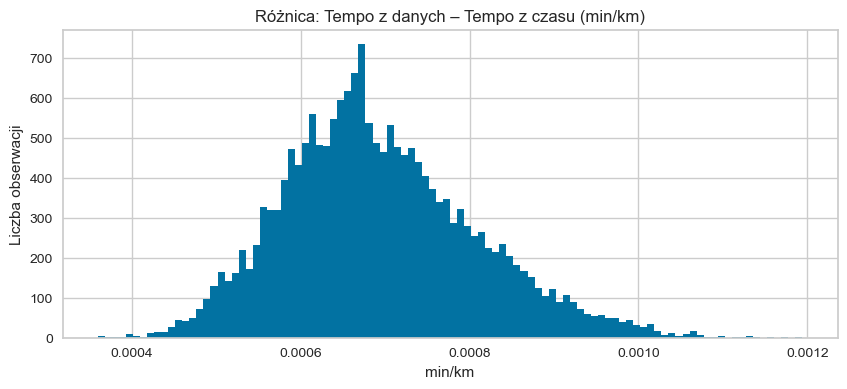

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
pace_check["Diff_min_na_km"].hist(bins=100)
plt.title("Różnica: Tempo z danych – Tempo z czasu (min/km)")
plt.xlabel("min/km")
plt.ylabel("Liczba obserwacji")
plt.show()

## Wnioski z analizy tempa biegu (`Tempo` vs tempo wyliczone z czasu)

Na podstawie analizy porównującej:
- tempo zapisane w danych (`Tempo`),
- tempo wyliczone na podstawie czasu końcowego (`Czas_sek`) i dystansu półmaratonu,

wyprowadzamy następujące wnioski:

---

### 1. Spójność tempa z czasem końcowym

- Średnie tempo z danych (`Tempo_z_danych`) oraz tempo wyliczone z czasu (`Tempo_z_czasu`) są **praktycznie identyczne**:
  - średnia różnica wynosi ok. **0.0007 min/km** (≈ **0.04 s/km**),
  - odchylenia standardowe obu miar są niemal takie same.
- Minimalne i maksymalne wartości tempa są spójne i realistyczne dla półmaratonu.

Oznacza to, że:
- kolumna `Tempo` jest **poprawnie obliczona**,
- czas końcowy (`Czas_sek`) oraz dystans półmaratonu (**21.0975 km**) są ze sobą zgodne.

---

### 2. Analiza różnic (`Diff_min_na_km`)

- Różnica pomiędzy tempem z danych a tempem wyliczonym z czasu:
  - jest **zawsze dodatnia**,
  - mieści się w bardzo wąskim zakresie:  
    **~0.00036 – 0.00119 min/km**.
- Nawet największe odchylenia odpowiadają różnicy rzędu:
  - **~0.07 s/km**,  
  co w praktyce biegowej i analitycznej jest **pomijalne**.

---

### 3. Charakter odchyleń

- Największe różnice występują u:
  - zawodników z długimi czasami końcowymi (3:15–3:32),
  - co wskazuje na **efekt zaokrągleń**, a nie błąd danych.
- Odchylenia są:
  - systematyczne,
  - niewielkie,
  - niezależne od płci i roku biegu.

To sugeruje, że:
- `Tempo` zostało najprawdopodobniej wyliczone z czasu i dystansu,
- z użyciem zaokrągleń (np. do określonej liczby miejsc po przecinku).

---

### 4. Wnioski jakościowe

- Dane dotyczące tempa i czasu są **wewnętrznie spójne**.
- Nie wykryto:
  - błędów jednostek,
  - niespójnych dystansów,
  - anomalii wymagających korekty.
- Różnice pomiędzy `Tempo` a tempem wyliczonym z `Czas_sek` są **czysto numeryczne** i wynikają z precyzji zapisu.

---

### 5. Decyzje projektowe

Na podstawie powyższej analizy przyjmuje się, że:

- kolumna `Tempo` jest pochodną czasu końcowego i dystansu oraz jest wewnętrznie spójna z danymi źródłowymi,
- mimo poprawności danych, kolumna `Tempo` **nie jest wykorzystywana jako cecha wejściowa modelu**, aby:
  - uniknąć podawania tempa przez użytkownika,
  - ograniczyć błędy UX i niejednoznaczności jednostek,
  - trenować model na danych bezpośrednio porównywalnych z wejściem aplikacji.
- zamiast tempa, jako główne wejście modelu wykorzystywany jest **czas na dystansie 5 km**, który jest:
  - łatwiejszy do podania przez użytkownika,
  - obiektywny,
  - spójny z danymi historycznymi.

Analiza tempa pełni rolę **walidacji jakości danych**, a nie elementu bezpośrednio wykorzystywanego w modelu.


In [23]:
# =========================================================
# 1. Usunięcie DNS / DNF
# =========================================================

df = df[~df["Czas"].isin(["DNS", "DNF"])].copy()

# =========================================================
# 2. Rocznik → Wiek
# =========================================================

df["Rocznik"] = pd.to_numeric(df["Rocznik"], errors="coerce").astype("Int64")
df["Wiek"] = df["Rok"] - df["Rocznik"]

# =========================================================
# 3. Płeć – normalizacja
# =========================================================

df["Płeć"] = (
    df["Płeć"]
    .astype(str)
    .str.strip()
    .str.upper()
    .replace({"F": "K"})
)

df = df[df["Płeć"].isin(["M", "K"])]

# =========================================================
# 4. Czas 5 km → sekundy (KLUCZOWE)
# =========================================================

df["Czas_5km_sek"] = df["5 km Czas"].apply(time_to_seconds)

# =========================================================
# 5. Filtry jakościowe
# =========================================================

df = df.dropna(subset=["Czas_sek", "Czas_5km_sek", "Wiek"])

# półmaraton: 1h – 4h
df = df[(df["Czas_sek"] >= 3600) & (df["Czas_sek"] <= 14400)]

# 5 km: 15 – 60 min
df = df[(df["Czas_5km_sek"] >= 900) & (df["Czas_5km_sek"] <= 3600)]

# wiek: 10 – 90
df = df[(df["Wiek"] >= 10) & (df["Wiek"] <= 90)]

df = df.reset_index(drop=True)

model_df = df[[
    "Czas_5km_sek",
    "Wiek",
    "Płeć",
    "Rok",
    "Czas_sek"
]].copy()

print("✅ Dane po czyszczeniu:", model_df.shape)

display(
    model_df[[
        "Płeć",
        "Wiek",
        "Czas_5km_sek",
        "Czas_sek",
        "Rok"
    ]].head()
)


✅ Dane po czyszczeniu: (17905, 5)


,Płeć,Wiek,Czas_5km_sek,Czas_sek,Rok
0,M,27,946,4104.0,2023
1,M,35,971,4216.0,2023
2,M,28,972,4227.0,2023
3,M,40,969,4234.0,2023
4,M,24,937,4278.0,2023


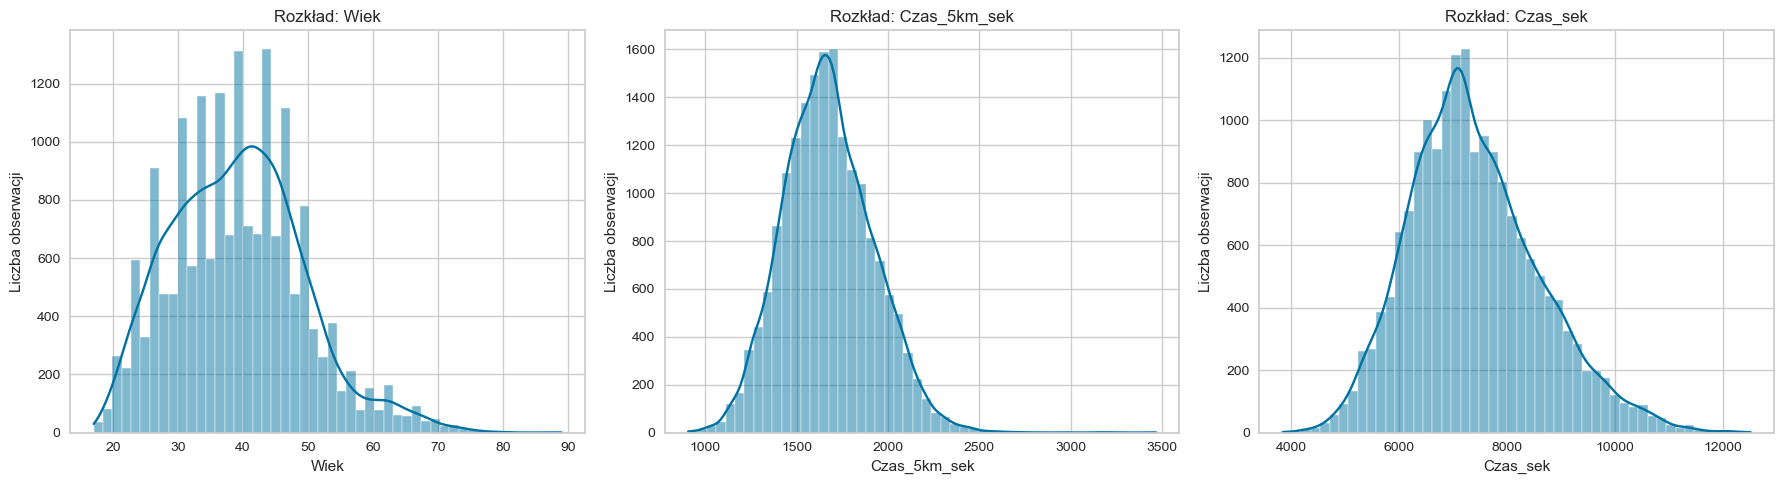

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

features = [
    "Wiek",
    "Czas_5km_sek",
    "Czas_sek"
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, features):
    sns.histplot(
        model_df[col],
        bins=50,
        kde=True,
        ax=ax
    )
    ax.set_title(f"Rozkład: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Liczba obserwacji")

plt.tight_layout()
plt.show()

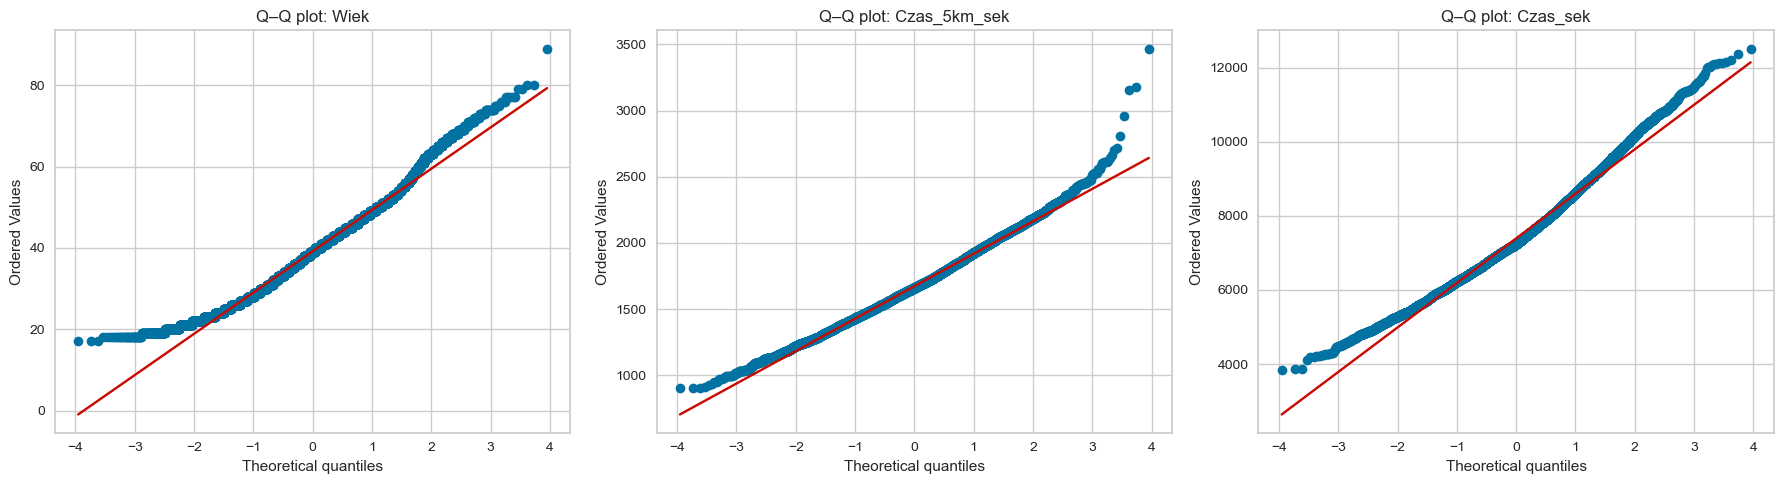

In [26]:
import scipy.stats as stats

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, features):
    stats.probplot(model_df[col], dist="norm", plot=ax)
    ax.set_title(f"Q–Q plot: {col}")

plt.tight_layout()
plt.show()

In [27]:
model_df[features].describe().T

,count,mean,std,min,25%,50%,75%,max
Wiek,17905.0,39.182407,10.232699,17.0,32.0,39.0,46.0,89.0
Czas_5km_sek,17905.0,1672.348338,245.806681,906.0,1501.0,1660.0,1833.0,3467.0
Czas_sek,17905.0,7391.999441,1210.65428,3843.0,6544.0,7240.0,8127.0,12512.0


Rozkłady zmiennych **Wiek**, **Czas_5km_sek** oraz **Czas_sek** charakteryzują się naturalną prawostronną skośnością, typową dla danych sportowych. Nie obserwujemy patologicznych odchyleń ani obecności ekstremalnych obserwacji odstających. W związku z tym rezygnujemy ze stosowania transformacji rozkładu (np. Yeo–Johnson).

In [24]:
exp = setup(
    data=model_df,
    target="Czas_sek",
    session_id=42,

    # preprocessing
    normalize=True,
    normalize_method="zscore",
    transformation=False,

    # features
    categorical_features=["Płeć"],
    numeric_features=["Czas_5km_sek", "Wiek", "Rok"],

    # walidacja
    fold=5,

    # bezpieczeństwo
    remove_outliers=False,  # bo już zrobiłeś to lepiej ręcznie
)

,Description,Value
0,Session id,42
1,Target,Czas_sek
2,Target type,Regression
3,Original data shape,"(17905, 5)"
4,Transformed data shape,"(17905, 5)"
5,Transformed train set shape,"(12533, 5)"
6,Transformed test set shape,"(5372, 5)"
7,Numeric features,3
8,Categorical features,1
9,Preprocess,True
